In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from dataset import CustomImageDataset, CustomSampler
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [6]:
import os
import shutil

def copy_first_n_files(source_directory, destination_directory, n=100):
    try:
        # 获取源目录中的文件列表
        files = os.listdir(source_directory)

        # 确保要复制的文件数量不超过实际文件数量
        n = min(n, len(files))

        # 创建目标目录（如果不存在）
        os.makedirs(destination_directory, exist_ok=True)

        # 复制前n个文件
        for file_name in files[:n]:
            source_path = os.path.join(source_directory, file_name)
            destination_path = os.path.join(destination_directory, file_name)
            shutil.copy(source_path, destination_path)
        print(f"成功复制前 {n} 个文件从 '{source_directory}' 到 '{destination_directory}'")
    except FileNotFoundError:
        print(f"目录 '{source_directory}' 不存在。")
    except PermissionError:
        print(f"没有权限访问目录 '{source_directory}' 或目录 '{destination_directory}'。")
    except Exception as e:
        print(f"发生错误: {e}")

# 源目录路径
source_directory = '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1_add/broke'
#source_directory = '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/shift group5'
# 目标目录路径
destination_directory = '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/test_group/broke'

# 调用函数来复制前n个文件
copy_first_n_files(source_directory, destination_directory, n=5000)

成功复制前 5000 个文件从 '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1_add/broke' 到 '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/test_group/broke'


In [33]:
import os

def count_files_in_directory(directory_path):
    try:
        # 获取目录中的文件列表
        files = os.listdir(directory_path)

        # 获取文件数量
        num_files = len(files)

        # 输出文件数量
        print(f"目录 '{directory_path}' 中有 {num_files} 个文件。")

    except FileNotFoundError:
        print(f"目录 '{directory_path}' 不存在。")
    except PermissionError:
        print(f"没有权限访问目录 '{directory_path}'。")

# 要查看的目录路径
directory_path = '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1/broke/'

# 调用函数来获取文件数量
count_files_in_directory(directory_path)


目录 '/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1/broke/' 中有 50 个文件。


In [21]:
torch.manual_seed(55)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

transform = transforms.Compose([
    transforms.Resize((32, 32)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# 加載數據集
train_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1', transform=transform)
test_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/broke_F1210', transform=transform)
# test_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/Phison/Conditional_Diffusion/CDDIM/select', transform=transform)
# # 創建 DataLoader
# # 分割數據集
# train_size = int(0.8 * len(dataset))  # 假設80%用於訓練
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
batch_size = 64
# 創建 DataLoader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 檢查數據集的類別
classes = train_dataset.classes
print("Classes:", classes)


# 顯示數據集的大小
print("train Dataset size:", len(train_dataset))
print("test Dataset size:", len(test_dataset))

Using device: cuda:0
Classes: ['broke', 'good', 'shift']
train Dataset size: 9590
test Dataset size: 502


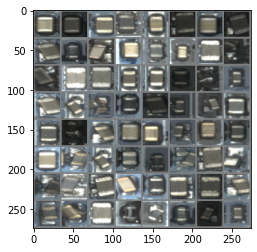

good  good  good  good  good  shift good  shift shift good  shift good  good  good  good  shift shift good  good  good  good  good  shift good  shift shift shift good  shift good  shift good  good  shift shift good  good  shift good  good  good  shift shift good  good  shift shift shift shift shift shift shift good  shift good  shift shift shift good  good  shift good  shift good 


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 3)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
# net = SimpleCNN()
# net.to(device)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# criterion = nn.CrossEntropyLoss().to(device)

In [4]:
from torchvision.models import resnet18
net = resnet18()
net.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 3),
    )
net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss().to(device)

In [5]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # 每2000個小批次輸出一次結果
            print('[%d, %5d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [6]:
PATH = './classifier_add_before.pth'
torch.save(net.state_dict(), PATH)

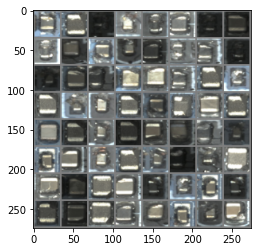

GroundTruth:  broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke broke


In [7]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
net = resnet18()
net.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 3),
    )
net.load_state_dict(torch.load(PATH))

# net = SimpleCNN()
# net.load_state_dict(torch.load(PATH))

outputs = net(images)

In [9]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  good  shift shift shift


In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 0 %


In [13]:
# # prepare to count predictions for each class
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}

# # again no gradients needed
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predictions = torch.max(outputs, 1)
#         # collect the correct predictions for each class
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label]] += 1
#             total_pred[classes[label]] += 1
        

# # print accuracy for each class

# for classname, correct_count in correct_pred.items():
#     if total_pred[classname] == 0:
#         accuracy = 0
#     else:
#         accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [36]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
        

# print accuracy for each class

for classname, correct_count in correct_pred.items():
    if total_pred[classname] == 0:
        accuracy = 0
    else:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: broke is 0.0 %
Accuracy for class: good  is 0.0 %
Accuracy for class: shift is 0.0 %


In [79]:
torch.manual_seed(37)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

transform = transforms.Compose([
    transforms.Resize((32, 32)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 加載數據集
train_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1_add', transform=transform)
test_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/DenoisingDiffusionProbabilityModel-ddpm-/dataset/only_group1_add', transform=transform)
# test_dataset = ImageFolder(root='/root/notebooks/nfs/work/barry.chen/Phison/Conditional_Diffusion/CDDIM/select', transform=transform)
# # 創建 DataLoader
# # 分割數據集
# train_size = int(0.8 * len(dataset))  # 假設80%用於訓練
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
batch_size=64
# 創建 DataLoader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 檢查數據集的類別
classes = train_dataset.classes
print("Classes:", classes)


# 顯示數據集的大小
print("train Dataset size:", len(train_dataset))
print("test Dataset size:", len(test_dataset))

Using device: cuda:0
Classes: ['broke', 'good', 'shift']
train Dataset size: 15150
test Dataset size: 15150


In [7]:
class BasicBlock(nn.Module):
    """Basic Block for resnet 18 and resnet 34
    """

    #BasicBlock and BottleNeck block
    #have different output size
    #we use class attribute expansion
    #to distinct
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        #residual function
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion)
        )

        #shortcut
        self.shortcut = nn.Sequential()

        #the shortcut output dimension is not the same with residual function
        #use 1*1 convolution to match the dimension
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        return nn.LeakyReLU(inplace=True)(self.residual_function(x) + self.shortcut(x))

class BottleNeck(nn.Module):
    """Residual block for resnet over 50 layers
    """
    expansion = 2
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, stride=stride, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BottleNeck.expansion, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * BottleNeck.expansion)
            )

    def forward(self, x):
        return nn.LeakyReLU(inplace=True)(self.residual_function(x) + self.shortcut(x))

class ResNet(nn.Module):

    def __init__(self, block, num_block, num_classes=100):
        super().__init__()

        self.in_channels = 64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True))
        #we use a different inputsize than the original paper
        #so conv2_x's stride is 1
        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        """make resnet layers(by layer i didnt mean this 'layer' was the
        same as a neuron netowork layer, ex. conv layer), one layer may
        contain more than one residual block
        Args:
            block: block type, basic block or bottle neck block
            out_channels: output depth channel number of this layer
            num_blocks: how many blocks per layer
            stride: the stride of the first block of this layer
        Return:
            return a resnet layer
        """

        # we have num_block blocks per layer, the first block
        # could be 1 or 2, other blocks would always be 1
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        output = self.conv3_x(output)
        output = self.conv4_x(output)
        output = self.conv5_x(output)
        output = self.avg_pool(output)
        output = self.dropout(output)
        output = output.view(output.size(0), -1)
        output = self.fc(output)

        return output

def resnet18():
    """ return a ResNet 18 object
    """
    return ResNet(BasicBlock, [2, 2, 2, 2])

def resnet34():
    """ return a ResNet 34 object
    """
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    """ return a ResNet 50 object
    """
    return ResNet(BottleNeck, [3, 4, 6, 3])

def resnet101():
    """ return a ResNet 101 object
    """
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    """ return a ResNet 152 object
    """
    return ResNet(BottleNeck, [3, 8, 36, 3])

In [11]:
net = resnet152()
net.fc = nn.Sequential(
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 3),
    )
net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss().to(device)

In [12]:
# from torchvision.models import resnet18
# net = resnet18()
# net.fc = nn.Sequential(
#         nn.Linear(512, 256),
#         nn.ReLU(),
#         nn.Dropout(0.5),
#         nn.Linear(256, 3),
#     )
# net.to(device)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# criterion = nn.CrossEntropyLoss().to(device)

# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 3)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
# net = SimpleCNN()
# net.to(device)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# criterion = nn.CrossEntropyLoss().to(device)


for epoch in range(40):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # 每2000個小批次輸出一次結果
            print('[%d, %5d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.869716
[1,   200] loss: 0.708807
[2,   100] loss: 0.562986
[2,   200] loss: 0.351466
[3,   100] loss: 0.218488
[3,   200] loss: 0.146350
[4,   100] loss: 0.090087
[4,   200] loss: 0.077465
[5,   100] loss: 0.056306
[5,   200] loss: 0.051847
[6,   100] loss: 0.040649
[6,   200] loss: 0.036011
[7,   100] loss: 0.022403
[7,   200] loss: 0.018183
[8,   100] loss: 0.025629
[8,   200] loss: 0.025321
[9,   100] loss: 0.016054
[9,   200] loss: 0.014731
[10,   100] loss: 0.011692
[10,   200] loss: 0.017529
[11,   100] loss: 0.008926
[11,   200] loss: 0.014314
[12,   100] loss: 0.014899
[12,   200] loss: 0.016299
[13,   100] loss: 0.005147
[13,   200] loss: 0.009570
[14,   100] loss: 0.006108
[14,   200] loss: 0.007559
[15,   100] loss: 0.005527
[15,   200] loss: 0.003168
[16,   100] loss: 0.005977
[16,   200] loss: 0.004776
[17,   100] loss: 0.004669
[17,   200] loss: 0.002975
[18,   100] loss: 0.009025
[18,   200] loss: 0.008072
[19,   100] loss: 0.003855
[19,   200] loss: 0

In [15]:
PATH_1 = './classifier_after_add.pth'
torch.save(net.state_dict(), PATH_1)

# net = SimpleCNN()
# net.load_state_dict(torch.load(PATH_1))
# net = resnet18()
# net.fc = nn.Sequential(
#         nn.Linear(512, 256),
#         nn.ReLU(),
#         nn.Dropout(0.5),
#         nn.Linear(256, 3),
#     )
net = resnet152()
net.fc = nn.Sequential(
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 3),
    )
net.load_state_dict(torch.load(PATH_1))

<All keys matched successfully>

In [37]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 46 %


In [55]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
net.eval()
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] == 0:
        accuracy = 0
    else:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: broke is 44.8 %
Accuracy for class: good  is 0.0 %
Accuracy for class: shift is 0.0 %


In [80]:
from sklearn.metrics import *
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            output = net(images)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(labels.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(net, device, testloader)
print('F1 score: %f' % f1_score(actuals, predictions, average='weighted'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

F1 score: 0.228389
Accuracy score: 0.313333


In [84]:
 print(classification_report(actuals, predictions, target_names=classes, digits=5))

              precision    recall  f1-score   support

        good    0.37264   0.20784   0.26685      5610
       broke    0.00000   0.00000   0.00000      5001
       shift    0.29790   0.78894   0.43249      4539

    accuracy                        0.31333     15150
   macro avg    0.22351   0.33226   0.23311     15150
weighted avg    0.22724   0.31333   0.22839     15150



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
